In [1]:
%load_ext autoreload
%autoreload 2

# Moving Average with CNN

In [2]:
from scipy.signal import lfilter
from matplotlib import pyplot as plt

In [3]:
import numpy as np

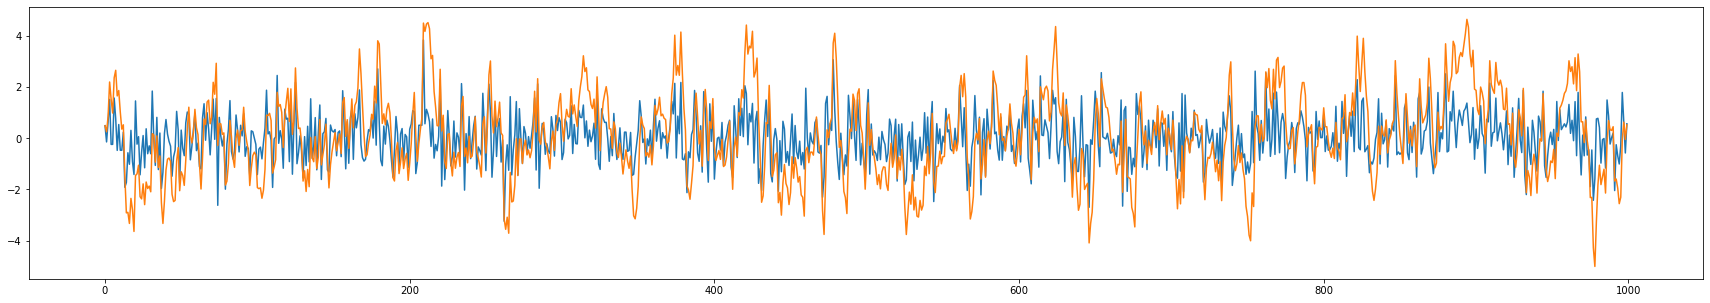

In [4]:
np.random.seed(42)
# filter_coefs = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
# filter_coefs = (filter_coefs/len(filter_coefs))
alpha = 0.8
N_coefs = 20
filter_coefs = np.power(alpha, np.abs(list(range(0, N_coefs)))) #[::-1]
X = np.random.normal(0, 1, 1000)
y_MA = lfilter(filter_coefs, [1], X)
plt.figure(figsize=(30, 5))
plt.plot(X)
plt.plot(y_MA)

Text(0.5, 1.0, 'Respuesta al impulso MA(20)')

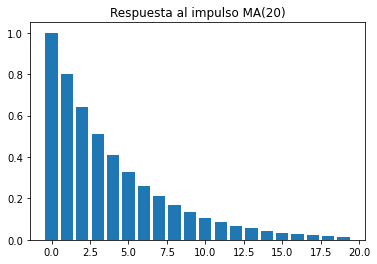

In [5]:
impulse = np.zeros(20)
impulse[0] = 1
impulse_response = lfilter(filter_coefs, [1], impulse)
plt.bar(range(len(impulse_response)), impulse_response)
plt.title('Respuesta al impulso MA(20)')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D

In [102]:
def get_CNN_model(input_shape=(1000, 1), kernel_size=len(filter_coefs)):
    model = Sequential()
    model.add(Conv1D(filters=1, kernel_size=kernel_size, strides=1, input_shape=(1000, 1)))
    model.compile(optimizer='adam', loss='mse')
    return model

In [8]:
model_CNN = get_CNN_model()
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 981, 1)            21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_CNN.fit(X.reshape(1, -1, 1), y_MA[len(filter_coefs)-1:].reshape(1, -1, 1), epochs=500, verbose=0)

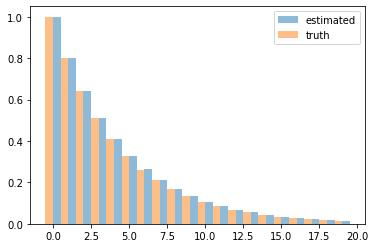

In [19]:
plt.bar(range(len(filter_coefs)), model_CNN.layers[0].get_weights()[0].flatten()[::-1], alpha=0.5, width=0.5, align='edge', label='estimated')
plt.bar(range(len(filter_coefs)), filter_coefs, alpha=0.5, width=-0.5, align='edge', label='truth')
plt.legend()

In [20]:
prediction_CNN = model_CNN.predict(X.reshape(1, -1, 1))

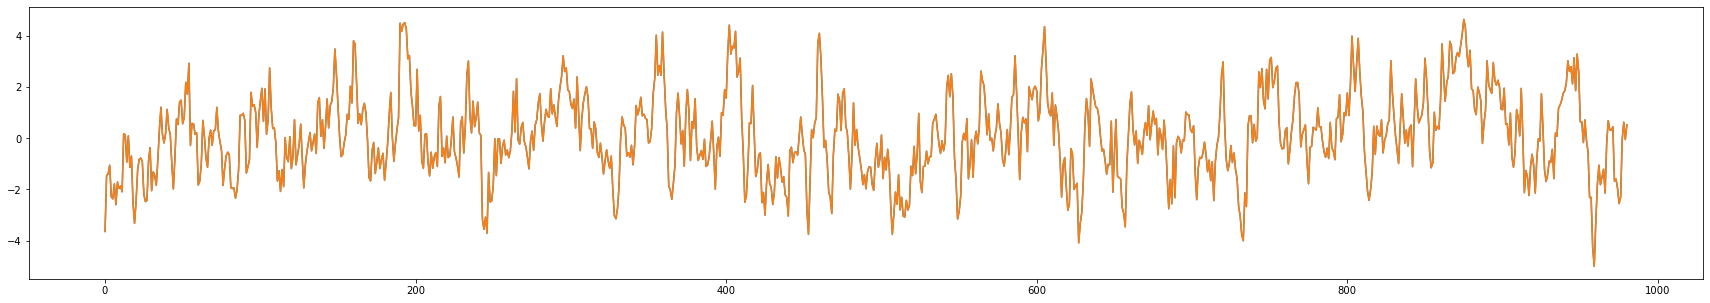

In [22]:
plt.figure(figsize=(30, 5))

plt.plot(y_MA[19:])
plt.plot(prediction_CNN.flatten())

# AR with RNN

In [81]:
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense

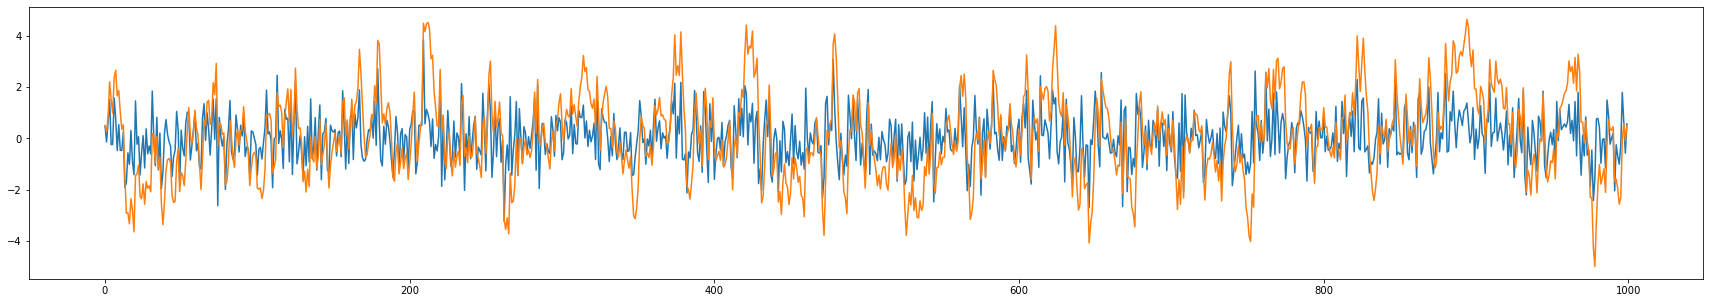

In [82]:
# np.random.seed(42)
# X = np.random.normal(0, 1, 1000)
y_AR1 = lfilter([1], [1, -alpha], X)
plt.figure(figsize=(30, 5))
plt.plot(X)
plt.plot(y_AR1)

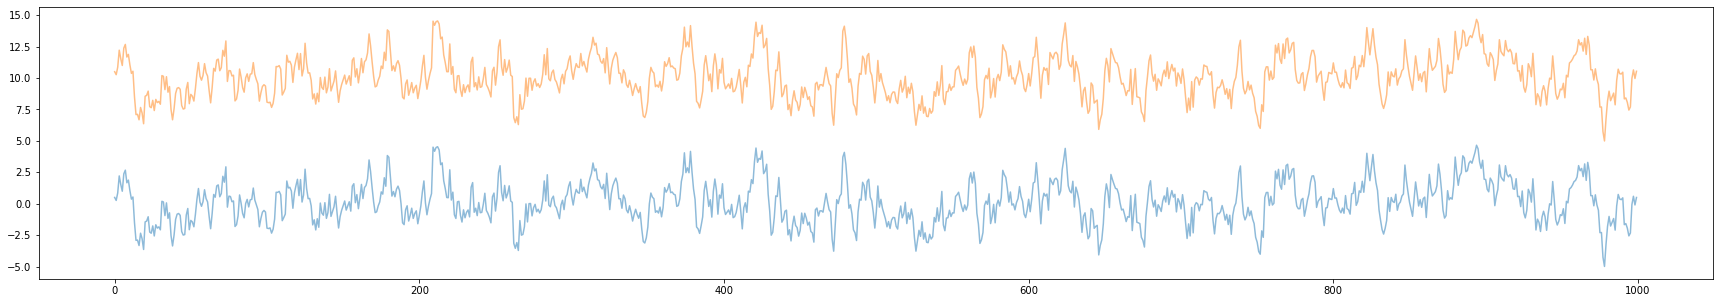

In [83]:
plt.figure(figsize=(30, 5))
plt.plot(y_AR1, alpha=0.5)
plt.plot(y_MA + 10, alpha=0.5)

Text(0.5, 1.0, 'Respuesta al impulso AR(1)')

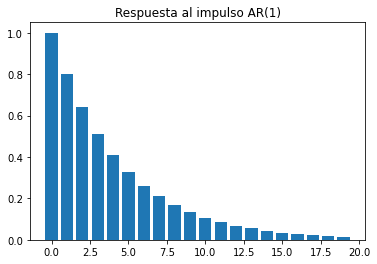

In [84]:
impulse = np.zeros(20)
impulse[0] = 1
plt.bar(range(len(impulse)), lfilter([1], [1, -alpha], impulse))
plt.title('Respuesta al impulso AR(1)')

In [85]:
def get_RNN_1():
    model_RNN_1 = Sequential()
    model_RNN_1.add(SimpleRNN(1, input_shape=(1000, 1), return_sequences=True, activation='linear', unroll=True))
    model_RNN_1.compile(optimizer='rmsprop', loss='mse')
    return model_RNN_1

In [86]:
model_RNN_1 = get_RNN_1()
model_RNN_1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1000, 1)           3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [87]:
%%time
model_RNN_1.fit(X.reshape(1, -1, 1), y_AR1.reshape(1, -1, 1), epochs=1, verbose=0)
# unroll=True Wall time: 30 s

CPU times: user 25.2 s, sys: 507 ms, total: 25.7 s
Wall time: 25.6 s


In [92]:
%%time
model_RNN_1.fit(X.reshape(1, -1, 1), y_AR1.reshape(1, -1, 1), epochs=1000, verbose=0)
# unroll=True Wall time: 34.5 s

CPU times: user 18.3 s, sys: 1.42 s, total: 19.7 s
Wall time: 13.7 s


In [93]:
model_RNN_1.layers[0].get_weights()

[array([[0.9995272]], dtype=float32),
 array([[0.7995126]], dtype=float32),
 array([-0.00048369], dtype=float32)]

In [94]:
prediction_RNN_1 = model_RNN_1.predict(X.reshape(1, -1, 1)).flatten()

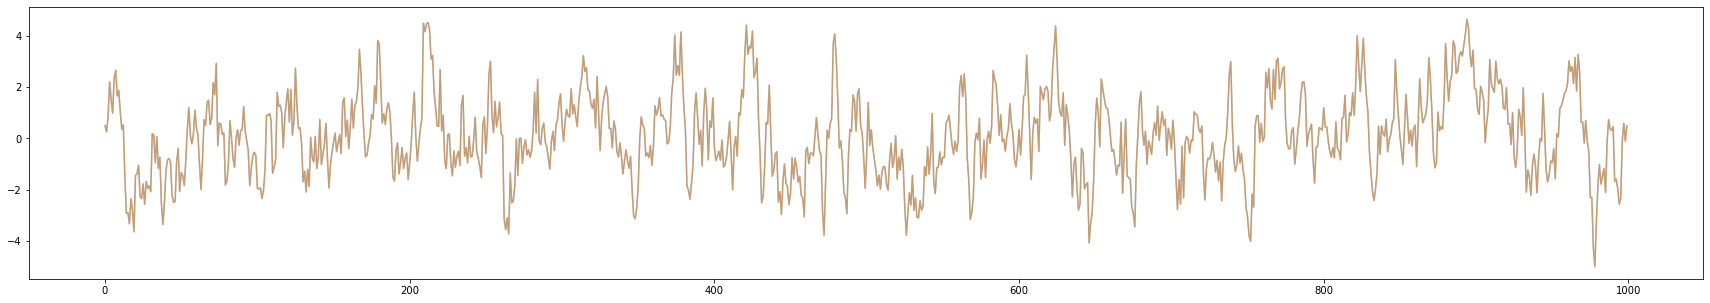

In [95]:
plt.figure(figsize=(30, 5))

plt.plot(y_AR1, alpha=0.5)
plt.plot(prediction_RNN_1, alpha=0.5)

# AR 2

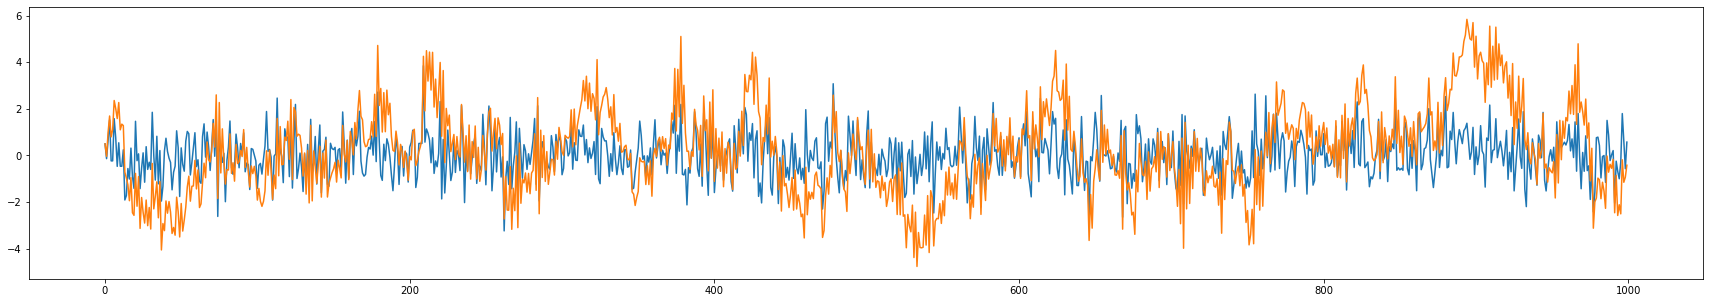

In [112]:
beta=0.1
y_AR2 = lfilter([1], [1, -0.2, -0.7], X)
plt.figure(figsize=(30, 5))
plt.plot(X)
plt.plot(y_AR2)

Text(0.5, 1.0, 'Respuesta al impulso AR(1)')

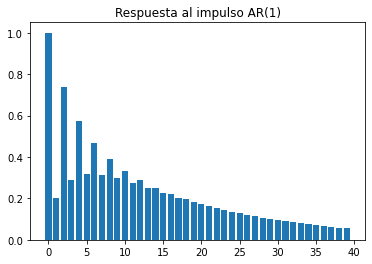

In [113]:
impulse = np.zeros(40)
impulse[0] = 1
plt.bar(range(len(impulse)), lfilter([1], [1, -0.2, -0.7], impulse))
plt.title('Respuesta al impulso AR(1)')

## Solved with CNN

In [138]:
filter_length = 20
model_CNN_AR = get_CNN_model(input_shape=(1000, 1), kernel_size=filter_length)
model_CNN_AR.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 981, 1)            21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [139]:
model_CNN_AR.fit(X.reshape(1, -1, 1), y_AR2[filter_length-1:].reshape(1, -1, 1), epochs=5000, verbose=0)

In [140]:
prediction_CNN_AR2 = model_CNN_AR.predict(X.reshape(1, -1, 1)).flatten()

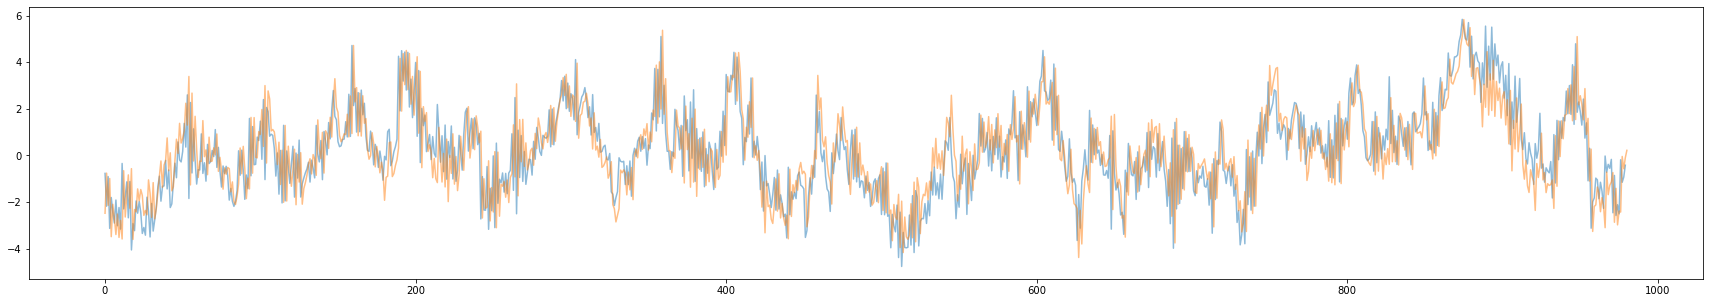

In [141]:
plt.figure(figsize=(30, 5))

plt.plot(y_AR2[filter_length:], alpha=0.5)
plt.plot(prediction_CNN_AR2, alpha=0.5)

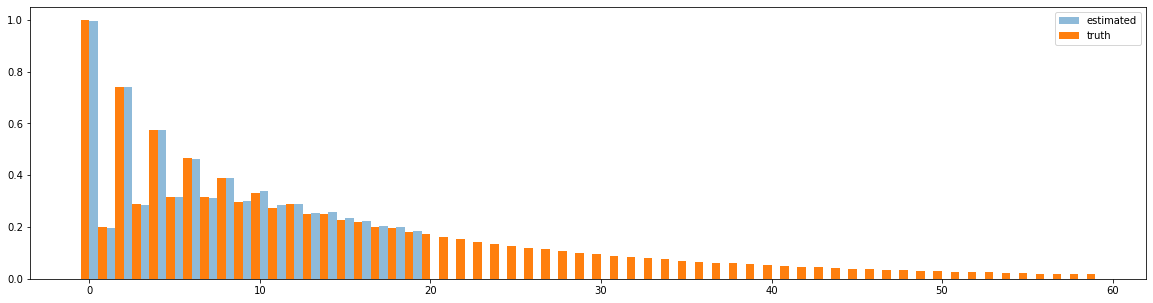

In [142]:
plt.figure(figsize=(20, 5))
plt.bar(range(filter_length), model_CNN_AR.layers[0].get_weights()[0].flatten()[::-1], alpha=0.5, width=0.5, align='edge', label='estimated')
impulse = np.zeros(60)
impulse[0] = 1
plt.bar(range(len(impulse)), lfilter([1], [1, -0.2, -0.7], impulse), width=-0.5, align='edge', label='truth')
plt.legend()

# Solved with RNN Anterior

In [143]:
model_RNN_1 = get_RNN_1()
model_RNN_1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 1000, 1)           3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [144]:
model_RNN_1.fit(X.reshape(1, -1, 1), y_AR2.reshape(1, -1, 1), epochs=1, verbose=0)

In [145]:
%%time
model_RNN_1.fit(X.reshape(1, -1, 1), y_AR2.reshape(1, -1, 1), epochs=5000, verbose=0)

CPU times: user 1min 34s, sys: 10.9 s, total: 1min 45s
Wall time: 1min 11s


In [146]:
model_RNN_1.layers[0].get_weights()

[array([[0.61945546]], dtype=float32),
 array([[0.93693584]], dtype=float32),
 array([0.00090129], dtype=float32)]

In [147]:
prediction_RNN_1_b = model_RNN_1.predict(X.reshape(1, -1, 1)).flatten()

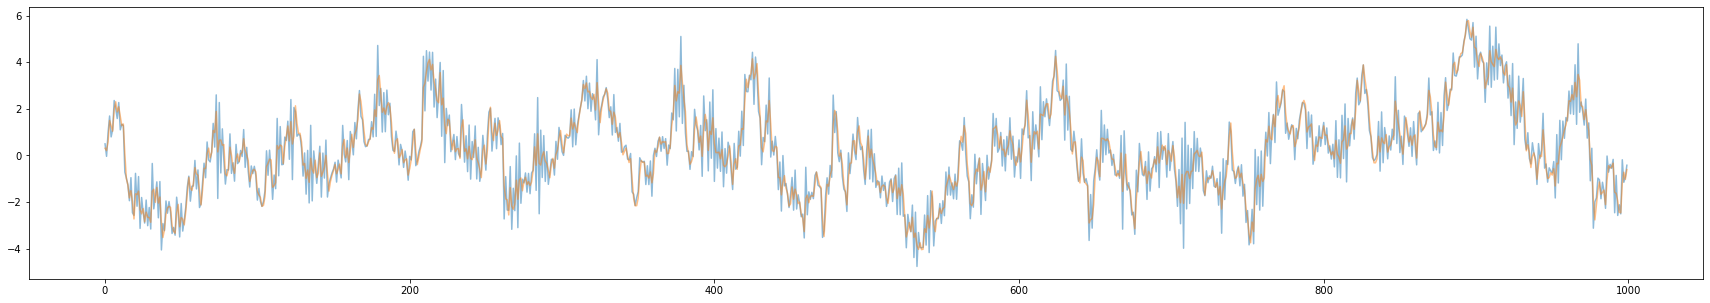

In [148]:
plt.figure(figsize=(30, 5))

plt.plot(y_AR2, alpha=0.5)
plt.plot(prediction_RNN_1_b, alpha=0.5)

## Agregado de neurona

In [65]:
model_RNN_2 = Sequential()
model_RNN_2.add(SimpleRNN(2, input_shape=(1000, 1), return_sequences=True, activation='linear', unroll=True))
model_RNN_2.add(Dense(1, activation='linear'))
model_RNN_2.compile(optimizer='rmsprop', loss='mse')

In [66]:
model_RNN_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 1000, 2)           8         
_________________________________________________________________
dense (Dense)                (None, 1000, 1)           3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [67]:
%%time
model_RNN_2.fit(X.reshape(1, -1, 1), y_AR2.reshape(1, -1, 1), epochs=5000, verbose=0)

In [84]:
model_RNN_2.get_weights()

[array([[-0.18161155, -0.9188171 ]], dtype=float32),
 array([[ 0.11566273, -0.98967636],
        [-0.7162804 ,  0.08315939]], dtype=float32),
 array([-0.0019684 ,  0.00108563], dtype=float32),
 array([[ 0.5041162],
        [-1.1868366]], dtype=float32),
 array([0.03103462], dtype=float32)]

In [68]:
prediction_RNN_2 = model_RNN_2.predict(X.reshape(1, -1, 1)).flatten()

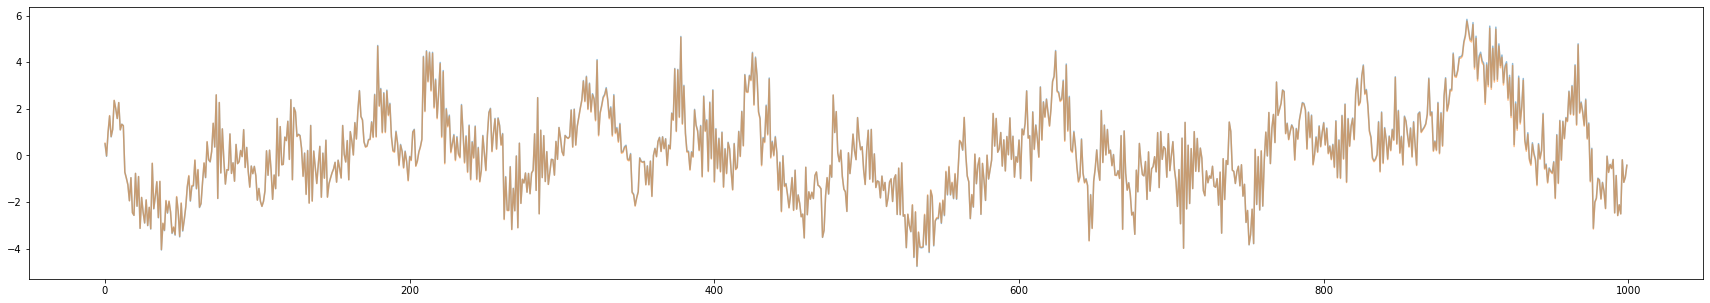

In [69]:
plt.figure(figsize=(30, 5))

plt.plot(y_AR2, alpha=0.5)
plt.plot(prediction_RNN_2, alpha=0.5)

## Stack de RNNs

In [74]:
model_stack = Sequential()
model_stack.add(SimpleRNN(2, input_shape=(1000, 1), return_sequences=True, activation='linear', unroll=True))
model_stack.add(SimpleRNN(4, return_sequences=True, activation='linear', unroll=True))
model_stack.compile(optimizer='rmsprop', loss='mse')

In [79]:
model_stack.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 1000, 1)           3         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 1000, 1)           3         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [76]:
%%time
model_stack.fit(X.reshape(1, -1, 1), y_AR2.reshape(1, -1, 1), epochs=1, verbose=0)

CPU times: user 59.5 s, sys: 910 ms, total: 1min
Wall time: 1min


In [86]:
%%time
model_stack.fit(X.reshape(1, -1, 1), y_AR2.reshape(1, -1, 1), epochs=2000, verbose=0)

CPU times: user 1min 27s, sys: 7.79 s, total: 1min 35s
Wall time: 1min 8s


In [87]:
model_stack.get_weights()

[array([[1.1725413]], dtype=float32),
 array([[-0.7430852]], dtype=float32),
 array([-0.20055136], dtype=float32),
 array([[0.8528101]], dtype=float32),
 array([[0.9430822]], dtype=float32),
 array([0.09896299], dtype=float32)]

In [88]:
prediction_RNN_stack = model_stack.predict(X.reshape(1, -1, 1)).flatten()

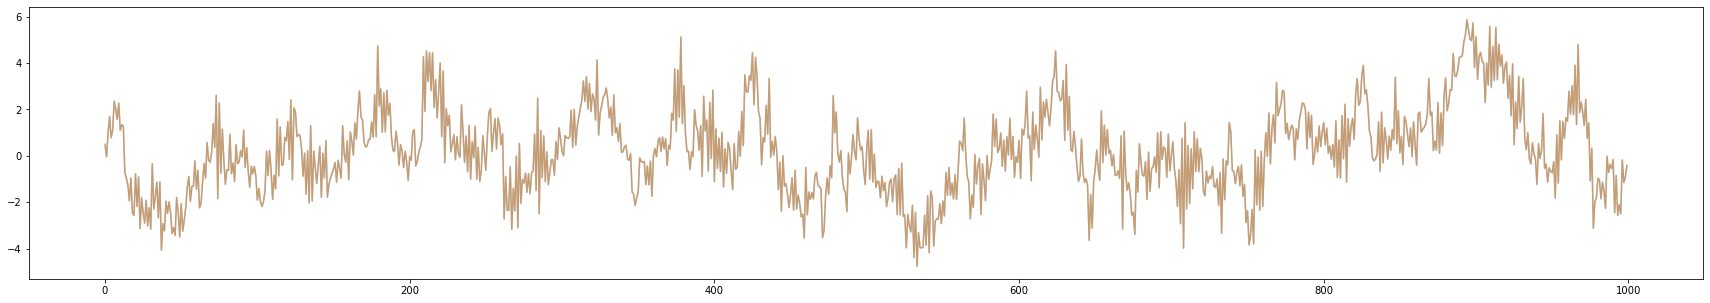

In [94]:
plt.figure(figsize=(30, 5))

plt.plot(y_AR2, alpha=0.5)
plt.plot(prediction_RNN_stack, alpha=0.5)

In [149]:
import numpy as np

In [166]:
X = [[1, 2, 3, 4, 5, 6], [2, 1, 3, 5, 1, 2]]


In [167]:
X

[[1, 2, 3, 4, 5, 6], [2, 1, 3, 5, 1, 2]]

In [ ]:
lista_total = np.vstack()

In [177]:
X = np.array(X).T
# X.reshape(-1, 2)

In [182]:
X.reshape(-1, 1)

array([[1],
       [2],
       [2],
       [1],
       [3],
       [3],
       [4],
       [5],
       [5],
       [1],
       [6],
       [2]])

In [191]:
np.array([1, 2, 3, 4, 5, 6, 2, 1, 3, 5, 1, 2]).reshape(-1, 2)

array([[1, 2],
       [3, 4],
       [5, 6],
       [2, 1],
       [3, 5],
       [1, 2]])